In [168]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import fftpack

In [169]:
def processing_of_signal(input, weights):
    assert len(input.shape) == len(weights.shape), f'The dimensions of the parameters do not match {len(input.shape)} != {len(weights.shape)}'

    output = np.zeros_like(input)
    number_of_weights = weights.shape[0] # bc number of weights to each time layer is located on column (in 2-dim case)

    print(weights.shape, input.shape)

    match len(input.shape):
        case 1: # signal depends on time
            for i in range(output.size - number_of_weights + 1):
                output[number_of_weights - 1 + i] = (input[i:number_of_weights + i] * weights).sum()

        case 2: # signal depends on time and x

            for j in range(input.shape[0]):
                for i in range(output.shape[1] - number_of_weights + 1):
                    output[j, number_of_weights - 1 + i] = (input[j, i:number_of_weights + i] * weights[:, j]).sum()
                    # print(i, j)

    return output

In [170]:
def getting_weights_1d(first_input_1d, second_input_1d, number_of_weights, mu_0, epsilon):
    # weights = np.random.random(number_of_weights)
    weights_1d = np.ones(number_of_weights)

    # print(len(second_input_1d[number_of_weights - 1:]))

    for k in range(len(second_input_1d[number_of_weights - 1:])):
        first_input_k = first_input_1d[k:number_of_weights + k]
        second_input_k = second_input_1d[k + number_of_weights - 1]

        mu_k = mu_0 / ((first_input_k ** 2).sum() + epsilon)
        # mu_k = 0.1

        p = second_input_k * first_input_k

        r = np.empty((number_of_weights, number_of_weights))

        for i in range(number_of_weights):
            for j in range(number_of_weights):
                r[i, j] = first_input_k[i] * first_input_k[j]

        grad_J = -2 * (p - r.dot(weights_1d))

        # if grad_J == 0:
        #     print("r.dot(weights_1d) = ", r.max())

        weights_1d -= mu_k * grad_J

    return weights_1d

In [171]:
def fitting_of_weights(first_input, second_input, number_of_weights, mu_0=1, epsilon=1):
    assert len(first_input.shape) == len(second_input.shape), f'The dimensions of the parameters do not match {len(first_input.shape)} != {len(second_input.shape)}'

    weights = np.array([0])

    match len(first_input.shape):
        case 1: # signal depends on time
            weights = getting_weights_1d(first_input, second_input, number_of_weights, mu_0, epsilon)

        case 2: # signal depends on time and x
            weights = getting_weights_1d(first_input[0, :], second_input[0, :], number_of_weights, mu_0, epsilon).reshape(number_of_weights, 1)

            for i in range(1, first_input.shape[0]):

                weights2 = getting_weights_1d(first_input[i, :], second_input[i, :], number_of_weights, mu_0, epsilon).reshape(number_of_weights, 1)

                # print(weights, weights2)
                weights = np.concatenate((weights, weights2), axis=1)
                print(weights.shape)


    return weights

In [172]:
def signal_1d(a, w, ph, time_counts): # number of oscillations per second
    return a * np.sin(ph + 2 * np.pi * w * time_counts)

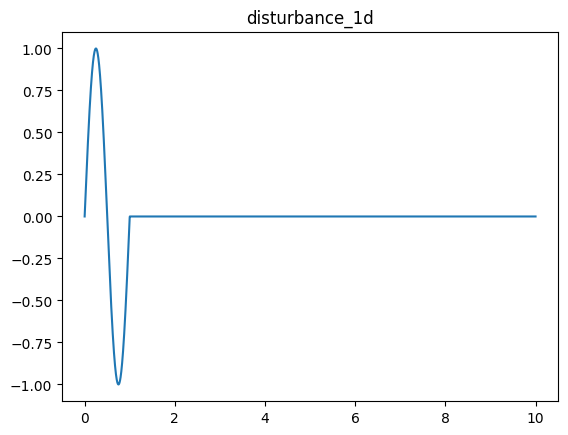

In [173]:
right_bound = 10
number_of_t = 10000
t = np.linspace(0, right_bound, number_of_t, endpoint=False)

disturbance_1d = signal_1d(1, 1, 0, t)
disturbance_1d[int(number_of_t / right_bound):] = 0

# step = 0
# disturbance_1d = np.roll(disturbance_1d, step)

plt.plot(t, disturbance_1d)
plt.title("disturbance_1d")
plt.show()

In [174]:
step = 100
first_input = disturbance_1d

number_of_x = 85
for i in range(1, number_of_x):
    first_input = np.vstack([first_input, np.roll(disturbance_1d, step * i)])
    # plt.plot(t, disturbance_1d)
    # plt.title("disturbance_1d")
    # plt.show()

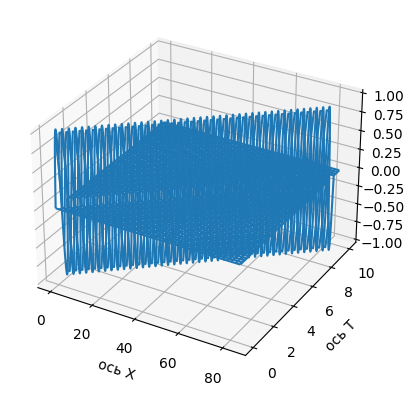

In [175]:
xgrid, tgrid = np.meshgrid(np.arange(number_of_x), t)


ax = plt.axes(projection='3d')
ax.plot_wireframe(xgrid, tgrid, first_input.T)
# ax.plot(tgrid, xgrid, tempU.reshape((len(np.unique(tempT)), len(np.unique(tempX)))))
plt.xlabel("ось X")
plt.ylabel("ось T")
plt.show()

Промоделируем входной сигнал такими весами

In [176]:
# processing_weights = np.array([0.1, 0.3, 0.5])
processing_weights = np.array(np.ones((1, number_of_x)) * 0.5)

In [177]:
second_input = processing_of_signal(first_input, processing_weights)

(1, 85) (85, 10000)


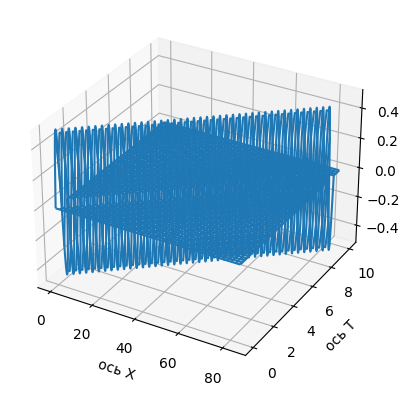

In [178]:
ax = plt.axes(projection='3d')
ax.plot_wireframe(xgrid, tgrid, second_input.T)
# ax.plot(tgrid, xgrid, tempU.reshape((len(np.unique(tempT)), len(np.unique(tempX)))))
plt.xlabel("ось X")
plt.ylabel("ось T")
plt.show()

In [179]:
number_of_weights = 1

In [180]:
approx_weights = fitting_of_weights(first_input, second_input, number_of_weights, 1, 1)
print(approx_weights)

(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 10)
(1, 11)
(1, 12)
(1, 13)
(1, 14)
(1, 15)
(1, 16)
(1, 17)
(1, 18)
(1, 19)
(1, 20)
(1, 21)
(1, 22)
(1, 23)
(1, 24)
(1, 25)
(1, 26)
(1, 27)
(1, 28)
(1, 29)
(1, 30)
(1, 31)
(1, 32)
(1, 33)
(1, 34)
(1, 35)
(1, 36)
(1, 37)
(1, 38)
(1, 39)
(1, 40)
(1, 41)
(1, 42)
(1, 43)
(1, 44)
(1, 45)
(1, 46)
(1, 47)
(1, 48)
(1, 49)
(1, 50)
(1, 51)
(1, 52)
(1, 53)
(1, 54)
(1, 55)
(1, 56)
(1, 57)
(1, 58)
(1, 59)
(1, 60)
(1, 61)
(1, 62)
(1, 63)
(1, 64)
(1, 65)
(1, 66)
(1, 67)
(1, 68)
(1, 69)
(1, 70)
(1, 71)
(1, 72)
(1, 73)
(1, 74)
(1, 75)
(1, 76)
(1, 77)
(1, 78)
(1, 79)
(1, 80)
(1, 81)
(1, 82)
(1, 83)
(1, 84)
(1, 85)
[[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.

In [181]:
approx_weights[0, 5]

0.5

Входной и выходной сигнал на адаптивный фильтр

ValueError: x and y must have same first dimension, but have shapes (10000,) and (85, 10000)

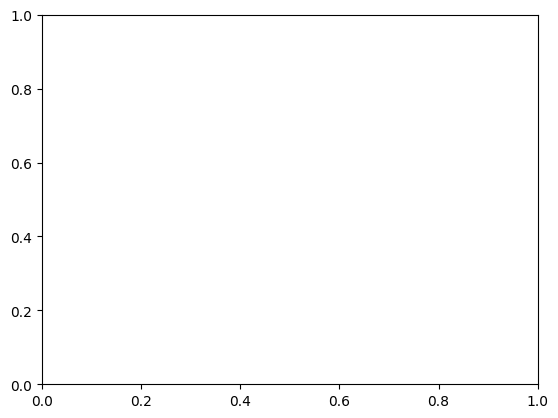

In [182]:
plt.plot(t, first_input)
plt.title("first_input")
plt.show()

freq_bound = 2100

x = fftpack.rfftfreq(first_input.size, right_bound / number_of_t)[:freq_bound]
y = 2 * np.abs(fftpack.rfft(first_input)[:freq_bound]) / first_input.size

plt.plot(x, y)
plt.title("AFH of first_input")
plt.show()

In [ ]:
plt.plot(t, second_input)
plt.title("second_input")
plt.show()

freq_bound = 2100

x = fftpack.rfftfreq(second_input.size, right_bound / number_of_t)[:freq_bound]
y = 2 * np.abs(fftpack.rfft(second_input)[:freq_bound]) / second_input.size

plt.plot(x, y)
plt.title("AFH of second_input")
plt.show()

Определим длину вектора высовых коэффициентов свертки, которыми мы будем апроксимировать АЧХ исходной системы

In [ ]:
number_of_weights = 3

Выведим полученные коэффициенты свертки

In [ ]:
approx_weights = fitting_of_weights(first_input, second_input, number_of_weights, 1, 1)
print(approx_weights)

Построим сигнал по найденным весам

In [ ]:
approx_signal = processing_of_signal(first_input, approx_weights)

In [ ]:
plt.plot(t, approx_signal, ".")
plt.title("approx_signal")
plt.show()

freq_bound = 1500

x = fftpack.rfftfreq(approx_signal.size, right_bound / number_of_t)[:freq_bound]
y = 2 * np.abs(fftpack.rfft(approx_signal)[:freq_bound]) / approx_signal.size

plt.plot(x, y, ".-")
plt.title("AFH of approx_signal")
plt.show()

Рассмотрим АЧХ исходной и полученной передаточной функции

In [ ]:
# all_spectrum = np.zeros(t.size)
# all_spectrum[int(t.size / 2)] = 1

all_spectrum = np.zeros(100)
all_spectrum[50] = 1

In [ ]:
initial_weights_signal = processing_of_signal(all_spectrum, processing_weights)

In [ ]:
plt.plot(np.arange(100), initial_weights_signal, ".")
plt.title("initial_weights_signal")
plt.show()

freq_bound = 1500

initial_fx = fftpack.fftfreq(initial_weights_signal.size, right_bound / number_of_t)[:freq_bound]
initial_fy = np.abs(fftpack.fft(initial_weights_signal)[:freq_bound])

plt.plot(initial_fx, initial_fy, ".")
plt.title("afh_initial_weights_signal")
plt.show()

In [ ]:
approx_weights_signal = processing_of_signal(all_spectrum, approx_weights)

In [ ]:
plt.plot(np.arange(100), approx_weights_signal, ".")
plt.title("approx_weights_signal")
plt.show()

freq_bound = 1500

approx_fx = fftpack.fftfreq(approx_weights_signal.size, right_bound / number_of_t)[:freq_bound]
approx_fy = np.abs(fftpack.fft(approx_weights_signal)[:freq_bound])

plt.plot(approx_fx, approx_fy, ".")
plt.title("afh_approx_weights_signal")
plt.show()

Наложим их АЧХ друг на друга

In [ ]:
plt.plot(initial_fx, initial_fy, ".")
plt.plot(approx_fx, approx_fy, ".")
plt.title("double AFH")

plt.show()